In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from imblearn.over_sampling import SMOTE

In [2]:
# Load the data
df = pd.read_csv('../Data/final_student.csv')


In [ ]:
# Drop rows containing NaN values
df = df.dropna()
df.info()

In [ ]:
# Perform one-hot encoding on categorical columns
finalStudent_encoded = pd.get_dummies(df, columns=['gender', 'region', 'highest_education',
                                                            'imd_band', 'age_band', 'disability',
                                                            'assessment_type'])

# Print the shape and first few rows of the encoded DataFrame
print("Shape of encoded DataFrame:", finalStudent_encoded.shape)
print(finalStudent_encoded.head())

# Save the encoded DataFrame to a new CSV file
finalStudent_encoded.to_csv('../Data/final_student_encoded.csv', index=False)

# Print a message to confirm the CSV file has been created
print("final_student_encoded.csv has been created successfully.")


In [ ]:
# re-import the encoded data
df = pd.read_csv('../Data/final_student_encoded.csv')
df.info()

<Axes: title={'center': 'Grading Scale Distribution'}, xlabel='grading_scale'>

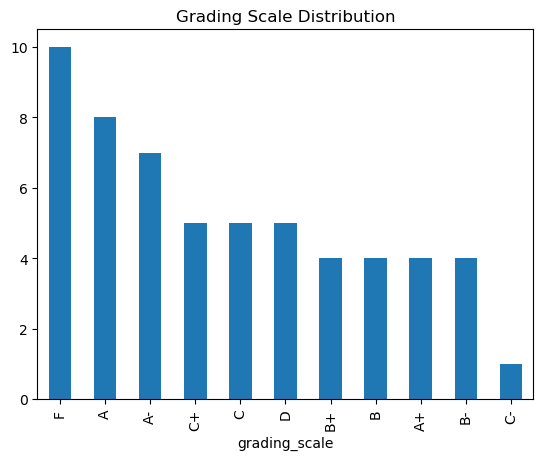

In [7]:
# Plot the distribution of the target variable (grading_scale)

df.grading_scale.value_counts().plot(kind='bar', title='Grading Scale Distribution')

In [18]:
# Find out how much data is available per drading_scale and print it out:

Aplus_df = df[(df.grading_scale == "A+")]
A_df= df[(df.grading_scale == "A")]
Aminus_df= df[(df.grading_scale == "A-")]

Bplus_df = df[(df.grading_scale == "B+")]
B_df= df[(df.grading_scale == "B")]
Bminus_df= df[(df.grading_scale == "B-")]

Cplus_df = df[(df.grading_scale == "C+")]
C_df= df[(df.grading_scale == "C")]
Cminus_df= df[(df.grading_scale == "C-")]

D_df= df[(df.grading_scale == "D")]

F_df= df[(df.grading_scale == "F")]


print(f'A+ df: {Aplus_df.shape}')
print(f'A df: {A_df.shape}')
print(f'A- df: {Aminus_df.shape}')

print(f'B+ df: {Bplus_df.shape}')
print(f'B df: {B_df.shape}')
print(f'B- df: {Bminus_df.shape}')

print(f'C+ df: {Cplus_df.shape}')
print(f'C df: {C_df.shape}')
print(f'C- df: {Cminus_df.shape}')

print(f'D df: {D_df.shape}')
print(f'F df: {F_df.shape}')

print(df.columns.tolist())


A+ df: (4, 38)
A df: (8, 38)
A- df: (7, 38)
B+ df: (4, 38)
B df: (4, 38)
B- df: (4, 38)
C+ df: (5, 38)
C df: (5, 38)
C- df: (1, 38)
D df: (5, 38)
F df: (10, 38)
['num_of_prev_attempts', 'studied_credits', 'date_average', 'module_presentation_length', 'grading_scale', 'gender_F', 'gender_M', 'region_East Anglian Region', 'region_East Midlands Region', 'region_Ireland', 'region_London Region', 'region_North Western Region', 'region_Scotland', 'region_South East Region', 'region_South Region', 'region_South West Region', 'region_Wales', 'region_West Midlands Region', 'region_Yorkshire Region', 'highest_education_A Level or Equivalent', 'highest_education_HE Qualification', 'highest_education_Lower Than A Level', 'imd_band_0-10%', 'imd_band_10-20', 'imd_band_20-30%', 'imd_band_30-40%', 'imd_band_40-50%', 'imd_band_50-60%', 'imd_band_60-70%', 'imd_band_70-80%', 'imd_band_80-90%', 'imd_band_90-100%', 'age_band_0-35', 'age_band_35-55', 'disability_N', 'disability_Y', 'assessment_type_CMA', 'a

## Discover factors affecting Grades

In [19]:
def create_factor_df(df):
    factor_df = df.T.drop(['grading_scale']).sum(axis=1).to_frame('value')
    factor_df = factor_df[(factor_df.T != 0).any()]
    factor_df = factor_df.sort_values(by='value', ascending=False,
    inplace=False)
    return factor_df

<Axes: >

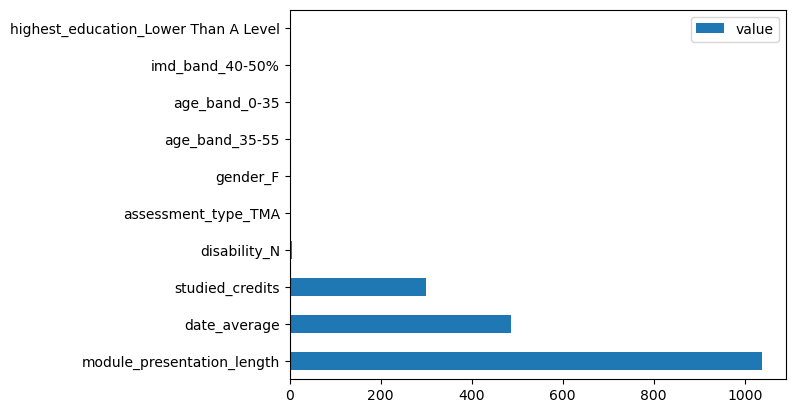

In [20]:
# Call create_factor_df() and plot it calling barh() for each grade. Start with A+ and end with F
# Plot the 10 top most inluential factors for each grade

Aplus_factor_df = create_factor_df(Aplus_df)
Aplus_factor_df.head(10).plot.barh()


In [23]:
# Create labels and feature dataframes
feature_df= df.drop(['grading_scale'], axis=1)
labels_df = df.grading_scale #.unique()
feature_df.head()


,num_of_prev_attempts,studied_credits,date_average,module_presentation_length,gender_F,gender_M,region_East Anglian Region,region_East Midlands Region,region_Ireland,region_London Region,...,imd_band_60-70%,imd_band_70-80%,imd_band_80-90%,imd_band_90-100%,age_band_0-35,age_band_35-55,disability_N,disability_Y,assessment_type_CMA,assessment_type_TMA
0,0,420,62,268,False,True,False,False,False,True,...,False,False,False,False,False,True,True,False,True,False
1,0,60,112,269,False,True,False,False,False,False,...,False,False,True,False,False,True,True,False,False,True
2,0,60,182,240,True,False,True,False,False,False,...,False,True,False,False,False,True,False,True,True,False
3,1,60,109,240,True,False,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False
4,0,60,114,240,True,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True


In [25]:
# Balance the data using SMOTE

oversample = SMOTE(k_neighbors=3)
transformed_feature_df, transformed_label_df = oversample.fit_resample(feature_df, labels_df)

print(f'new label count: {transformed_label_df.value_counts()}')
print(f'old label count: {df.grading_scale.value_counts()}')

TypeError: SMOTE.__init__() got an unexpected keyword argument 'n_neighbors'